In [63]:
import sys
sys.path.append('../utils')
sys.path.append('../src')

import numpy as np
import time
from transformers import AddTime 
from tools import brownian
from tools_trees import *
import iisignature
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sigKer_fast import sig_kernel

# Rescaling

In [140]:
length, dim, truncation = 299, 5, 6
X = 10*brownian(length, dim)

In [147]:
norms = []
norms_ker = []
flag = True
for k in np.arange(7, 20, 0.3):
    rescaled_path = float(1./k)*X
    rescaled_sig = iisignature.sig(rescaled_path, truncation)
    norms.append(np.sqrt(np.dot(rescaled_sig, rescaled_sig)+1))
    norms_ker.append(np.sqrt(sig_kernel(rescaled_path, rescaled_path, n=0)))
    if np.abs(norms[-1] - norms_ker[-1]) < 1e-2 and flag:
        print(float(1./k))
        flag=False

0.05181347150259069


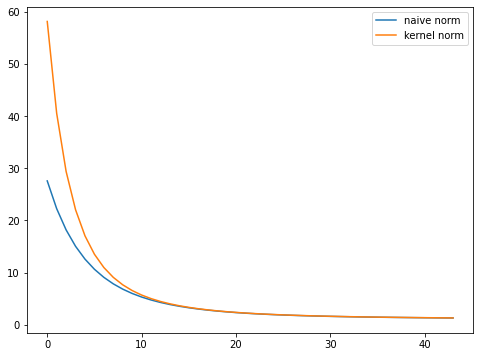

In [144]:
plt.figure(figsize=(8,6))
plt.plot(norms, label='naive norm')
plt.plot(norms_ker, label='kernel norm')
plt.legend()
plt.show()

# The Expected Signature features of a sequential tree

### Collections of data-streams

Suppose that instead of dealing with one single data-stream $X$ we deal with a collection of streams $C = \{X_1, \ldots, X_n\}$. Then the Expected Signature plays the same role as the Signature and it is simply defined as 

\begin{align}
    ES(C) = \frac{1}{n} \sum_{i=1}^n S(X_i)
\end{align}

### Sequential trees

A data-tree $t=(v,f)$ is defined recursively as a tuple given by a value $v$ (of some data type, possibly empty) and a forest $f=(t_1, \ldots, t_k)$ (a possibly empty list of trees).

A branching process $P$ consists of a tree $t=(v,f)$ where all values are of the form $v=(w,\gamma)$ where $w \in \mathbb{R}$ is a scalar weight and $\gamma : [0,T] \to \mathbb{R}^d$ is a data-stream of information happening in the given process.

The path-distribution of a branching process $P$ is the collection of all data-streams obtained by concatenating all the data-streams $\gamma$'s along every single subsequent branch of $P$.

## Example

### test

In [5]:
tree_depth, path_length, path_dim, truncation = 7, 100, 5, 3
root_path = AddTime().fit_transform([brownian(path_length, path_dim-1)])[0]
value = (1.,root_path)

In [6]:
tree_test = generate_brownian_tree(tree_depth, path_dim-1, value,
                                   min_branches=4, max_branches=4, 
                                   min_steps=50, max_steps=500, 
                                   rand=False)

In [7]:
L = extract_paths_from_tree(tree_test, list_of_paths=[])

In [8]:
t = time.time()
classicEsig = sum([iisignature.sig(l, truncation) for l in L])/float(len(L))
print('{:.2f} sec'.format(time.time()-t))

13.35 sec


In [9]:
t = time.time()
trEsig = treeEsig(tree_test, truncation)
print('{:.2f} sec'.format(time.time()-t))

2.58 sec


In [10]:
np.abs(np.sum(classicEsig - trEsig))<1e4

True

### 2-d plot

In [26]:
tree_depth, path_length, path_dim, truncation = 6, 100, 3, 2
root_path = AddTime().fit_transform([brownian(path_length, path_dim-1)])[0]
value = (1.,root_path)

In [27]:
tree = generate_brownian_tree(tree_depth, path_dim-1, value,
                              min_branches=2, max_branches=5, 
                              min_steps=50, max_steps=100, 
                              rand=True)

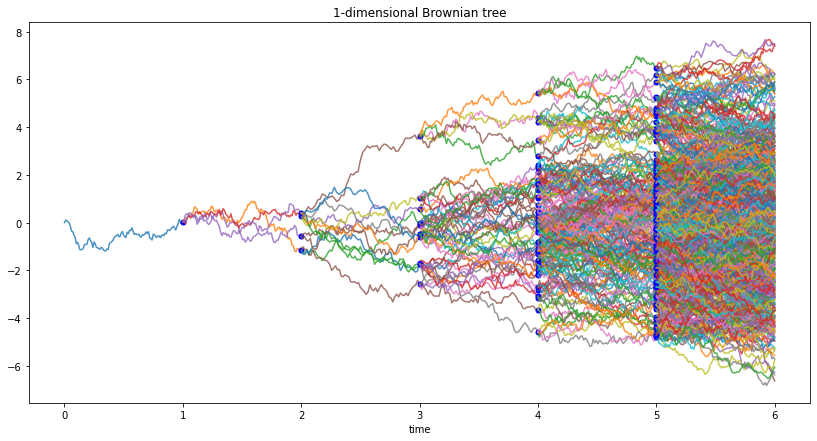

In [28]:
tree_plot(tree, tree_depth)

### 3-d plot

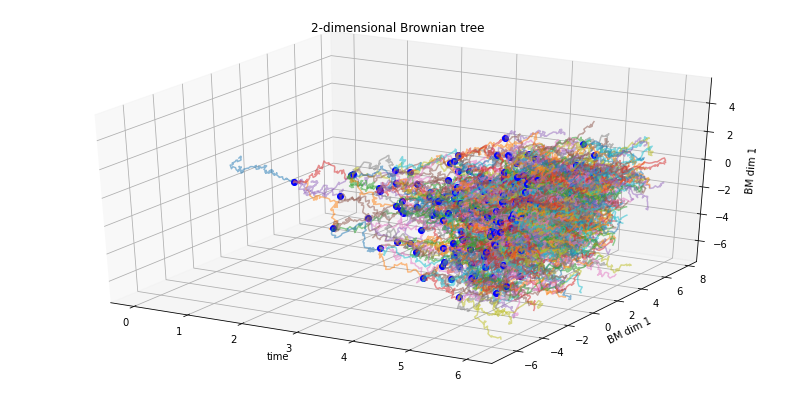

In [29]:
tree_plot3D(tree, tree_depth)

# Esig of tree

In [30]:
treeEsig(tree, truncation)

array([ 6.        ,  0.65784705, -1.6010765 , 18.        ,  3.0757341 ,
       -2.1902711 ,  0.8713481 ,  2.2326818 ,  0.31832534, -7.416188  ,
       -0.37227157,  2.9575262 ], dtype=float32)

# Distance between two trees

In [31]:
tree1 = generate_brownian_tree(tree_depth, path_dim-1, value, min_branches=2, max_branches=5, min_steps=50, max_steps=200)
tree2 = generate_brownian_tree(tree_depth, path_dim-1, value, min_branches=2, max_branches=5, min_steps=50, max_steps=200)

In [32]:
treeDistance(tree1, tree2, truncation)

7.192227

# Pairwise distance matrix of one list of trees

In [33]:
list_of_trees1 = [generate_brownian_tree(tree_depth, path_dim-1, value) for k in range(10)]
list_of_trees2 = [generate_brownian_tree(tree_depth, path_dim-1, value) for k in range(20)]

In [34]:
treeDistanceMatrix(list_of_trees1, truncation)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:   11.5s remaining:    7.6s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:   14.7s finished


memmap([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 9.3882122 ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [13.31755829,  5.87122059,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 8.93897057,  3.27463245,  6.16198301,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 7.36979342, 12.64439869, 15.02609444, 12.68235588,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 6.76952791,  8.98648548, 10.03625202,  7.94348574,  7.42072582,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 7.75467253,  3.52483773,  6.44639444,  4.58630705, 10.68113708,
          6.63066673,  0.       

# Pairwise distance matrix of two lists of trees

In [35]:
treePairwiseDistanceMatrix(list_of_trees1, list_of_trees2, truncation)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:  1.0min finished


memmap([[ 4.72936678,  7.98066759,  3.85984349,  5.24675226, 11.99053955,
          8.27172947,  5.12701941,  4.81245804,  4.45960093,  8.82983017,
          3.25840068,  7.27640009,  8.16933441,  4.95625114,  5.27083969,
          7.92178631, 12.57598019,  5.89458275,  8.57557392, 10.72004032],
        [ 5.24514294,  5.7502141 ,  6.18910122,  6.00348043,  8.42319202,
          2.72197199,  6.8408165 ,  7.6907115 ,  6.10866308,  3.05317712,
          7.24876165,  3.83682585,  7.00324821,  6.03251457,  4.75535059,
          3.90883064,  5.20024395,  3.97501659,  4.87328386,  4.52382898],
        [ 9.9026947 ,  6.64724922,  9.96282101,  9.50091362, 13.02313709,
          6.358634  , 11.74041843, 10.84296036,  9.35076523,  5.85310221,
         11.35660267,  9.49492741, 12.56094646, 10.3524704 ,  9.39859676,
          6.36400223,  4.57960844,  8.02090836,  6.04064512,  2.7539835 ],
        [ 5.66951609,  6.20004225,  6.09359503,  5.87961435,  9.17997932,
          3.89622116,  6.36222601, 